# Neural network 8 emotions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, callbacks, activations, regularizers
import numpy as np

2023-06-13 23:06:09.379805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def plot_results(hist):
  fig, axs = plt.subplots(1, 2, figsize=(25, 8))
  axs[0].plot(hist.history['loss'], label='loss')
  axs[0].plot(hist.history['val_loss'], label='val_loss')
  axs[1].plot(hist.history['accuracy'], label='accuracy')
  axs[1].plot(hist.history['val_accuracy'], label='val_accuracy')

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].legend()
  axs[0].grid(True)

  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Accuracy')
  axs[1].legend()
  axs[1].grid(True)

Load and scale data
Change labels to numerical values
Remove highly correlated features
Create train, validation and test splits

In [4]:
# loading the data
dataset = pd.read_csv('../dataset/labeled_8_combined_dataset.csv', index_col=0)

# getting unique labels
unique_labels = np.unique(dataset['LABEL'])
unique_labels

array(['Ekscytacja', 'Neutralna', 'Odprezenie', 'Radosc', 'Smutek',
       'Wstret', 'Zdziwienie', 'Zlosc'], dtype=object)

In [5]:
# changing labels to numerical
dataset.loc[dataset['LABEL'] == 'Ekscytacja', 'LABEL'] = 0.0
dataset.loc[dataset['LABEL'] == 'Neutralna', 'LABEL'] = 1.0
dataset.loc[dataset['LABEL'] == 'Odprezenie', 'LABEL'] = 2.0
dataset.loc[dataset['LABEL'] == 'Radosc', 'LABEL'] = 3.0
dataset.loc[dataset['LABEL'] == 'Smutek', 'LABEL'] = 4.0
dataset.loc[dataset['LABEL'] == 'Wstret', 'LABEL'] = 5.0
dataset.loc[dataset['LABEL'] == 'Zdziwienie', 'LABEL'] = 6.0
dataset.loc[dataset['LABEL'] == 'Zlosc', 'LABEL'] = 7.0

In [6]:
# separating data and labels
data = dataset.iloc[:, :-4]
labels = dataset.iloc[:, -1]
labels = np.asarray(labels).astype('float32')

# scaling the data
data_scaled = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# removing correlated features
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)

# creating train, validation and test splits
d, data_test, l, labels_test = train_test_split(data_scaled, labels, test_size=0.1, random_state=0, stratify=labels)
data_train, data_validation, labels_train, labels_validation = train_test_split(d, l, test_size=0.1, random_state=0, stratify=l)

In [7]:
BaseDense = partial(
    layers.Dense,
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=96, restore_best_weights=True)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=32)

# ECG

Extract only ecg related features

In [8]:
ecg_columns = [col for col in data.columns if 'ECG' in col or 'HRV' in col]

ecg_data_train = data_train[ecg_columns]
ecg_data_validation = data_validation[ecg_columns]
ecg_data_test = data_test[ecg_columns]

Define the model and train it

Epoch 1/1000


2023-06-13 23:06:30.883577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 23:06:31.818580: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3353 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-06-13 23:06:33.345500: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f699c014660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-13 23:06:33.345551: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-06-13 23:06:33.536458: I tensorflow/compile

134/134 [==============================] - 3s 6ms/step - loss: 3.4576 - accuracy: 0.1770 - val_loss: 3.0302 - val_accuracy: 0.1924 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 1s 5ms/step - loss: 2.8057 - accuracy: 0.1858 - val_loss: 2.6050 - val_accuracy: 0.1945 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 1s 5ms/step - loss: 2.4767 - accuracy: 0.1920 - val_loss: 2.3670 - val_accuracy: 0.1924 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 1s 4ms/step - loss: 2.2835 - accuracy: 0.1958 - val_loss: 2.2180 - val_accuracy: 0.1945 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 0s 4ms/step - loss: 2.1716 - accuracy: 0.2001 - val_loss: 2.1381 - val_accuracy: 0.1966 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 1s 4ms/step - loss: 2.1054 - accuracy: 0.2035 - val_loss: 2.0963 - val_accuracy: 0.1872 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 1s 4ms/step - l

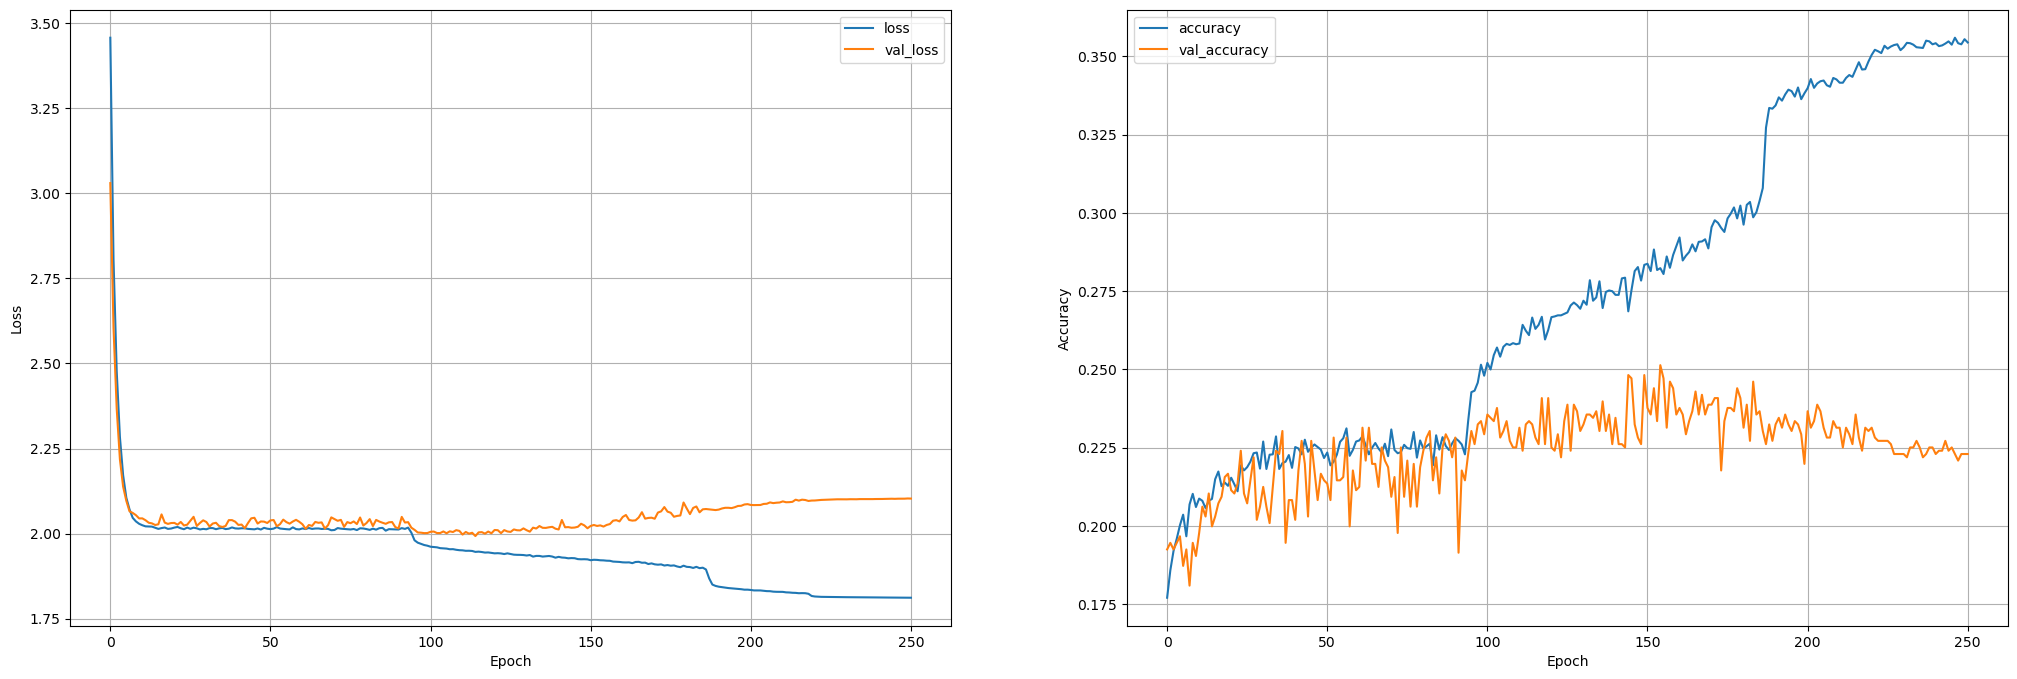

In [9]:
ecg_model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(8, activation='softmax')
])

ecg_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = ecg_model.fit(
    ecg_data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(ecg_data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [10]:
ecg_predictions = np.argmax(ecg_model.predict(ecg_data_test), axis=1)

ecg_cr = classification_report(labels_test, ecg_predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, ecg_predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.0000    0.0000    0.0000        88
   Neutralna     0.3127    0.5771    0.4056       201
  Odprezenie     0.3250    0.1161    0.1711       112
      Radosc     0.1702    0.0964    0.1231       166
      Smutek     0.0000    0.0000    0.0000        73
      Wstret     0.1979    0.3077    0.2409       182
  Zdziwienie     0.2143    0.0303    0.0531        99
       Zlosc     0.2131    0.3824    0.2737       136

    accuracy                         0.2422      1057
   macro avg     0.1791    0.1887    0.1584      1057
weighted avg     0.2022    0.2422    0.1962      1057



# EDA

Extract only eda related features

In [11]:
eda_columns = [col for col in data.columns if 'EDA' in col or 'SCR' in col]

eda_data_train = data_train[eda_columns]
eda_data_validation = data_validation[eda_columns]
eda_data_test = data_test[eda_columns]

Define the model and train it

Epoch 1/1000
134/134 [==============================] - 2s 8ms/step - loss: 3.2948 - accuracy: 0.1855 - val_loss: 2.9418 - val_accuracy: 0.1977 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.7304 - accuracy: 0.1972 - val_loss: 2.5844 - val_accuracy: 0.1966 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 1s 7ms/step - loss: 2.4341 - accuracy: 0.1928 - val_loss: 2.3243 - val_accuracy: 0.1945 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.2527 - accuracy: 0.2005 - val_loss: 2.1932 - val_accuracy: 0.1756 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.1473 - accuracy: 0.2039 - val_loss: 2.1274 - val_accuracy: 0.1966 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 1s 7ms/step - loss: 2.0915 - accuracy: 0.2060 - val_loss: 2.0775 - val_accuracy: 0.2093 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 1s

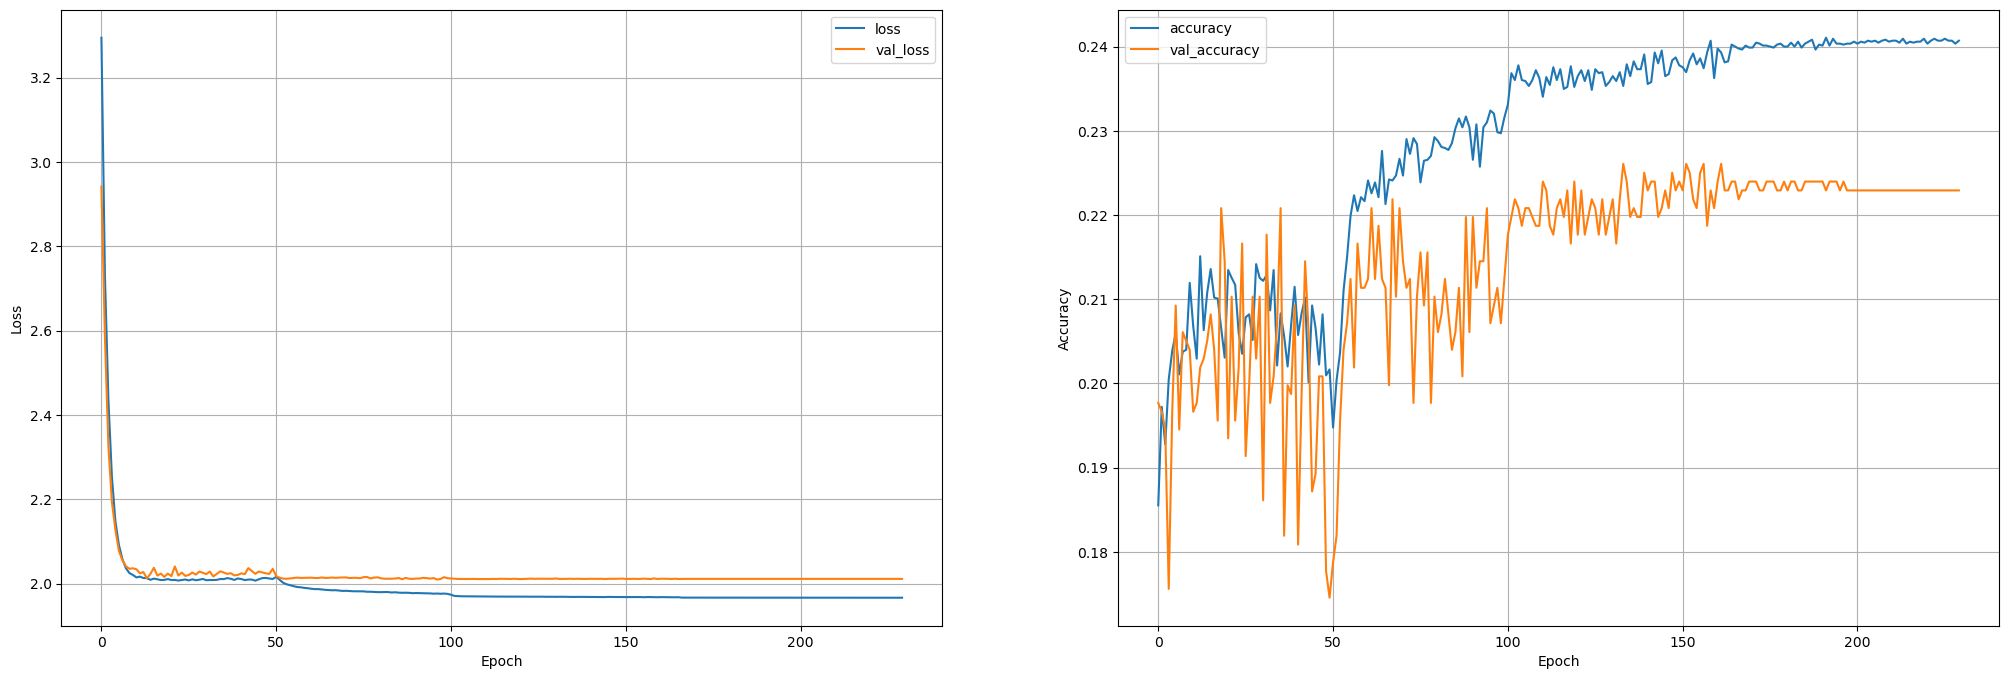

In [12]:
eda_model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(8, activation='softmax')
])

eda_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = eda_model.fit(
    eda_data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(eda_data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [13]:
eda_predictions = np.argmax(eda_model.predict(eda_data_test), axis=1)

eda_cr = classification_report(labels_test, eda_predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, eda_predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.1000    0.0114    0.0204        88
   Neutralna     0.2897    0.5721    0.3846       201
  Odprezenie     0.2571    0.0804    0.1224       112
      Radosc     0.2222    0.1807    0.1993       166
      Smutek     0.0000    0.0000    0.0000        73
      Wstret     0.1831    0.2143    0.1975       182
  Zdziwienie     0.0000    0.0000    0.0000        99
       Zlosc     0.2135    0.4191    0.2829       136

    accuracy                         0.2375      1057
   macro avg     0.1582    0.1847    0.1509      1057
weighted avg     0.1846    0.2375    0.1895      1057



# Combined

Epoch 1/1000
134/134 [==============================] - 2s 8ms/step - loss: 3.3399 - accuracy: 0.1811 - val_loss: 2.9731 - val_accuracy: 0.1851 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.7463 - accuracy: 0.1924 - val_loss: 2.5582 - val_accuracy: 0.1851 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.4287 - accuracy: 0.2017 - val_loss: 2.3284 - val_accuracy: 0.1903 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.2493 - accuracy: 0.2122 - val_loss: 2.2061 - val_accuracy: 0.1924 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.1426 - accuracy: 0.2208 - val_loss: 2.1332 - val_accuracy: 0.2208 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 1s 7ms/step - loss: 2.0841 - accuracy: 0.2270 - val_loss: 2.0899 - val_accuracy: 0.2166 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 1s

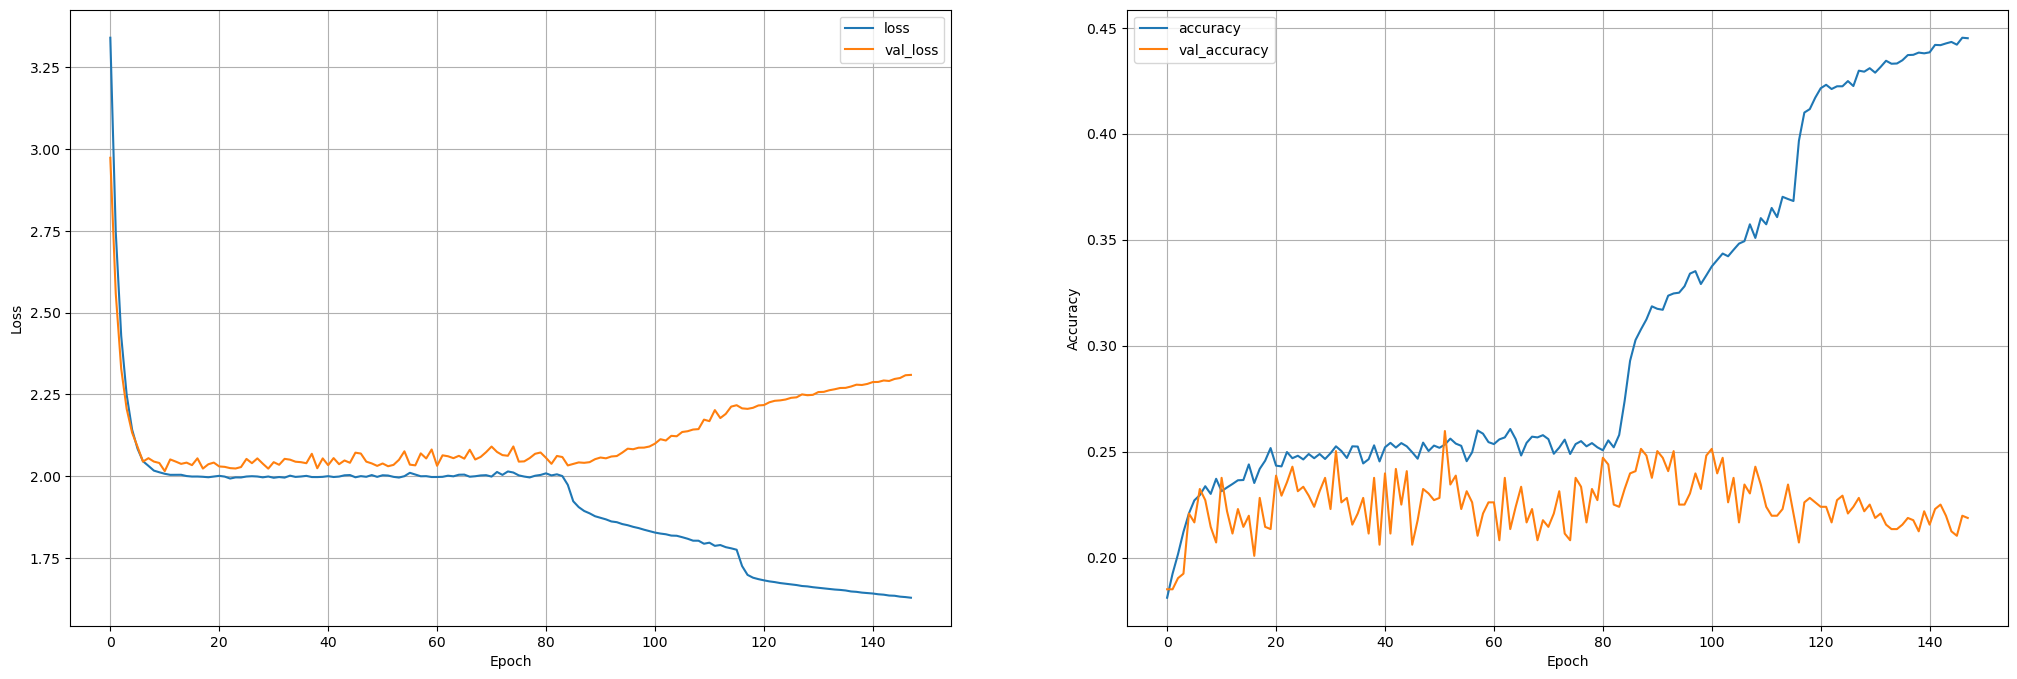

In [14]:
model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(8, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = model.fit(
    data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [15]:
predictions = np.argmax(model.predict(data_test), axis=1)

cr = classification_report(labels_test, predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.1333    0.0227    0.0388        88
   Neutralna     0.2800    0.5572    0.3727       201
  Odprezenie     0.2941    0.0893    0.1370       112
      Radosc     0.2042    0.2349    0.2185       166
      Smutek     0.2500    0.0137    0.0260        73
      Wstret     0.1951    0.1319    0.1574       182
  Zdziwienie     0.2222    0.1010    0.1389        99
       Zlosc     0.2286    0.4118    0.2940       136

    accuracy                         0.2403      1057
   macro avg     0.2259    0.1953    0.1729      1057
weighted avg     0.2287    0.2403    0.2027      1057



# Summary

In [16]:
print(f'''
\tAccuracy:
ECG:\t{ecg_cr['accuracy']}
EDA:\t{eda_cr['accuracy']}
Both:\t{cr['accuracy']}
\tAverage F1:
ECG:\t{ecg_cr['macro avg']['f1-score']}
EDA:\t{eda_cr['macro avg']['f1-score']}
Both:\t{cr['macro avg']['f1-score']}
\tWeighted F1:
ECG:\t{ecg_cr['weighted avg']['f1-score']}
EDA:\t{eda_cr['weighted avg']['f1-score']}
Both:\t{cr['weighted avg']['f1-score']}
''')


	Accuracy:
ECG:	0.24219489120151372
EDA:	0.23746452223273415
Both:	0.2403027436140019
	Average F1:
ECG:	0.15842071637038732
EDA:	0.15089435524829184
Both:	0.17290300160540056
	Weighted F1:
ECG:	0.19624161630235795
EDA:	0.1895158958488013
Both:	0.20266009455737852

